<h3>SESSION 8.1 - Denavit-Hartenberg description for the Anthropomorphic robot</h3>

 D-H Anthropomorphic Robot, Inverse Kinematics and Representation of the Work Area

### EXERCISE 8.1 - In this exercise you must achieve:

##### A) Draw the Resulting Matrix from the D-H table and the Description of the work area

#####  B) Create the equations and use the NSOLVE function to obtain the inverse kinematics and reach the point x,y,z=(0.3,0,0.4), obtain the angles of each joint 

#####  C) Check in the coppelia that it works

#####  D) Draw the work areas at theta1 angles 0º, 90º, -60º


The image in the figure represents an ANTHROPOMORPHIC robot studied in class and its D-H table.<br>
<img src="antro.jpg" width="500"><br>
From the parameters indicated in the image, calculate the coordinate transformation matrices for each joint and obtain its Work Area

We have a scene in Coppelia with a three-axis anthropomorphic robot that has the following link lengths:
    L1=0.2  , L2=0.2 and L3=0.2

<img src="coppeliascene.png" width="500"><br>

### You have to achieve the following results:

##### Solution to Question A:

<img src="antrores.png" width="500"><br>


##### Solution to Question B:

<img src="ik.png" width="500"><br>


##### Solution to Question C:

<img src="result.png" width="500"><br>


##### Solution to Question D:

<img src="antroarea.png" width="500"><br>



### A) Draw the Resulting Matrix from the D-H table and the Description of the work area


In [18]:
# We import the necessary libraries to work
import numpy as np
import sympy as sp
from sympy import *

from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

# we declare the symbols (lengths, variables, etc.) that will be used for a later formulation.

from sympy.physics.mechanics import dynamicsymbols
theta1, theta2, theta3, l1, l2, l3, theta, alpha, a, d = dynamicsymbols('theta1 theta2 theta3 l1 l2 l3 theta alpha a d')
theta1, theta2, theta3, l1, l2, l3, theta, alpha, a, d 


(theta1, theta2, theta3, l1, l2, l3, theta, alpha, a, d)

In [19]:
# The standard homogeneous transformation matrix is ​​represented as:

rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta),a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [20]:
# Transformation: 1st axis from '0' to '1'
m01 = m.subs({ theta:theta1, d:l1, a:0 , alpha:90*np.pi/180})
N(m01,2)

Matrix([
[cos(theta1), -6.1e-17*sin(theta1),  1.0*sin(theta1),   0],
[sin(theta1),  6.1e-17*cos(theta1), -1.0*cos(theta1),   0],
[          0,                  1.0,          6.1e-17,  l1],
[          0,                    0,                0, 1.0]])

In [21]:
# round to 0
m01[0,1]=0
m01[1,1]=0
m01[2,2]=0 #problem with rounding to 0  http://research.iac.es/sieinvens/python-course/source/sympy.html
m01

Matrix([
[cos(theta1),   0,  1.0*sin(theta1),  0],
[sin(theta1),   0, -1.0*cos(theta1),  0],
[          0, 1.0,                0, l1],
[          0,   0,                0,  1]])

In [22]:
# Transformation: 2nd axis from '1' to '2'
m12 = m.subs({ theta:theta2, d:0, a:l2, alpha:0})
m12[0,1]=0
m12[1,1]=0
m12[2,2]=0
m12 

Matrix([
[cos(theta2), 0, 0, l2*cos(theta2)],
[sin(theta2), 0, 0, l2*sin(theta2)],
[          0, 0, 0,              0],
[          0, 0, 0,              1]])

In [23]:
# Transformation: 3rd axis from '2' to '3'
m23 = m.subs({ theta:theta3, d:0, a:l3, alpha:0})
m23[0,1]=0
m23[1,1]=0
m23[2,2]=0
m23 

Matrix([
[cos(theta3), 0, 0, l3*cos(theta3)],
[sin(theta3), 0, 0, l3*sin(theta3)],
[          0, 0, 0,              0],
[          0, 0, 0,              1]])

In [24]:
# Resulting Matrix without simplification
m03 = (m01*m12*m23)
m03

Matrix([
[cos(theta1)*cos(theta2)*cos(theta3), 0, 0, l2*cos(theta1)*cos(theta2) + l3*cos(theta1)*cos(theta2)*cos(theta3)],
[sin(theta1)*cos(theta2)*cos(theta3), 0, 0, l2*sin(theta1)*cos(theta2) + l3*sin(theta1)*cos(theta2)*cos(theta3)],
[        1.0*sin(theta2)*cos(theta3), 0, 0,            l1 + 1.0*l2*sin(theta2) + 1.0*l3*sin(theta2)*cos(theta3)],
[                                  0, 0, 0,                                                                   1]])

In [25]:
# Resulting Matrix we can simplify it further:
mbee= sp.Matrix([[sp.trigsimp(m03[0,0].simplify()), sp.trigsimp(m03[0,1].simplify()), sp.trigsimp(m03[0,2].simplify()),sp.trigsimp(m03[0,3].simplify())],
                 [sp.trigsimp(m03[1,0].simplify()), sp.trigsimp(m03[1,1].simplify()), sp.trigsimp(m03[1,2].simplify()),sp.trigsimp(m03[1,3].simplify())],
                 [m03[2,0].simplify(), m03[2,1].simplify(), m03[2,2].simplify(),sp.trigsimp(m03[2,3].simplify())],
                 [m03[3,0].simplify(), m03[3,1].simplify(), m03[3,2].simplify(),m03[3,3].simplify()]])

mbee

Matrix([
[cos(theta1)*cos(theta2)*cos(theta3), 0, 0,          (l2 + l3*cos(theta3))*cos(theta1)*cos(theta2)],
[sin(theta1)*cos(theta2)*cos(theta3), 0, 0,          (l2 + l3*cos(theta3))*sin(theta1)*cos(theta2)],
[        1.0*sin(theta2)*cos(theta3), 0, 0, 1.0*(l1 + l2*sin(theta2) + l3*sin(theta2)*cos(theta3))],
[                                  0, 0, 0,                                                      1]])

In [26]:
#We substitute the values of l1, l2, l3 in the matrix
mbee=mbee.subs({ l1:0.2, l2:0.2, l3:0.2 })
mbee

Matrix([
[cos(theta1)*cos(theta2)*cos(theta3), 0, 0,     (0.2*cos(theta3) + 0.2)*cos(theta1)*cos(theta2)],
[sin(theta1)*cos(theta2)*cos(theta3), 0, 0,     (0.2*cos(theta3) + 0.2)*sin(theta1)*cos(theta2)],
[        1.0*sin(theta2)*cos(theta3), 0, 0, 0.2*sin(theta2)*cos(theta3) + 0.2*sin(theta2) + 0.2],
[                                  0, 0, 0,                                                   1]])


### B) Create the equations and use the NSOLVE function to obtain the inverse kinematics and reach the point x,y,z=(0.3,0,0.4), obtain the angles of each joint
### C) Check in the coppelia that it works


In [27]:
x=0.3
y=0
z=0.4  
print(x,y,z)

0.3 0 0.4


In [28]:
# we prepare the equations by transforming the expressions
# from the form <expression = value> to the form <expression - value> = 0
from sympy import nsolve, Matrix
import numpy as np

# Define the equations
eq1 = (0.2*sp.cos(theta3) + 0.2)*sp.cos(theta1)*sp.cos(theta2) - x
eq2 = (0.2*sp.cos(theta3) + 0.2)*sp.sin(theta1)*sp.cos(theta2) - y
eq3 = 0.2*sp.sin(theta2)*sp.cos(theta3) + 0.2*sp.sin(theta2) + 0.2 - z




In [29]:
# solve

try:
    q = sp.nsolve((eq1, eq2, eq3), (theta1, theta2, theta3), (1,1,1), prec=5)
except:
    print("No solution found")
    q = [0,0,0]
print(Matrix(q))

# Convert to degrees and print
q = [float(val) for val in q]
q_deg = [round(qi*180/np.pi, 4) for qi in q]
print('theta1=', q_deg[0], 'º', '   theta2=', q_deg[1], 'º', '   theta3=', q_deg[2], 'º')

# checking the results (printout should be close to zero)
print("eq1:", eq1.subs({theta1: q[0], theta2: q[1], theta3: q[2]}).evalf())
print("eq2:", eq2.subs({theta1: q[0], theta2: q[1], theta3: q[2]}).evalf())
print("eq3:", eq3.subs({theta1: q[0], theta2: q[1], theta3: q[2]}).evalf())


Matrix([[-1.1709e-16], [0.58800], [0.63886]])
theta1= -0.0 º    theta2= 33.69 º    theta3= 36.604 º
eq1: 7.68532755768270e-8
eq2: -3.51262535629555e-17
eq3: -1.21513918802107e-7


In [30]:
# print in degrees
print('theta1=', q_deg[0], 'º', '   theta2=', q_deg[1], 'º', '   theta3=', q_deg[2], 'º')

theta1= -0.0 º    theta2= 33.69 º    theta3= 36.604 º


In [31]:
# CHeck in Coppelia

import coppeliasim_zmqremoteapi_client
from coppeliasim_zmqremoteapi_client import RemoteAPIClient
import numpy as np

def connect(port=23000):
    try:
        client = RemoteAPIClient('127.0.0.1', port)
        print(f"Connected to CoppeliaSim on port {port}")
        return client
    except Exception as e:
        print(f"Could not connect to CoppeliaSim on port {port}: {e}")
        return None

client = connect()
sim = client.getObject('sim')

# Get handles
joint1 = sim.getObjectHandle('/Joint1')
joint2 = sim.getObjectHandle('/Joint2')
joint3 = sim.getObjectHandle('/Joint3')
dummy = sim.getObjectHandle('/Dummy')

# Your solution in degrees
theta1_deg = -0.0
theta2_deg = 33.69
theta3_deg = 36.604

# Convert to radians
theta1 = np.deg2rad(theta1_deg)
theta2 = np.deg2rad(theta2_deg)
theta3 = np.deg2rad(theta3_deg)

# Set the joint positions
#sim.setJointPosition(joint1, theta1)
#sim.setJointPosition(joint2, theta2)
#sim.setJointPosition(joint3, theta3)

Connected to CoppeliaSim on port 23000


In [32]:
# Test Joint1
sim.setJointPosition(joint1, np.deg2rad(30))
sim.setJointPosition(joint2, 0)
sim.setJointPosition(joint3, 0)
print("Dummy position with Joint1 at 30°:", sim.getObjectPosition(dummy, -1))

# Test Joint2
sim.setJointPosition(joint1, 0)
sim.setJointPosition(joint2, np.deg2rad(30))
sim.setJointPosition(joint3, 0)
print("Dummy position with Joint2 at 30°:", sim.getObjectPosition(dummy, -1))

# Test Joint3
sim.setJointPosition(joint1, 0)
sim.setJointPosition(joint2, 0)
sim.setJointPosition(joint3, np.deg2rad(30))
print("Dummy position with Joint3 at 30°:", sim.getObjectPosition(dummy, -1))

Dummy position with Joint1 at 30°: [0.346405360504063, 0.20000313565338115, 0.19994985498055637]
Dummy position with Joint2 at 30°: [0.34643267017666757, -4.2851670324959385e-08, 0.3999551921117815]
Dummy position with Joint3 at 30°: [0.3732126251594308, 2.537687897520422e-06, 0.2999527872342084]


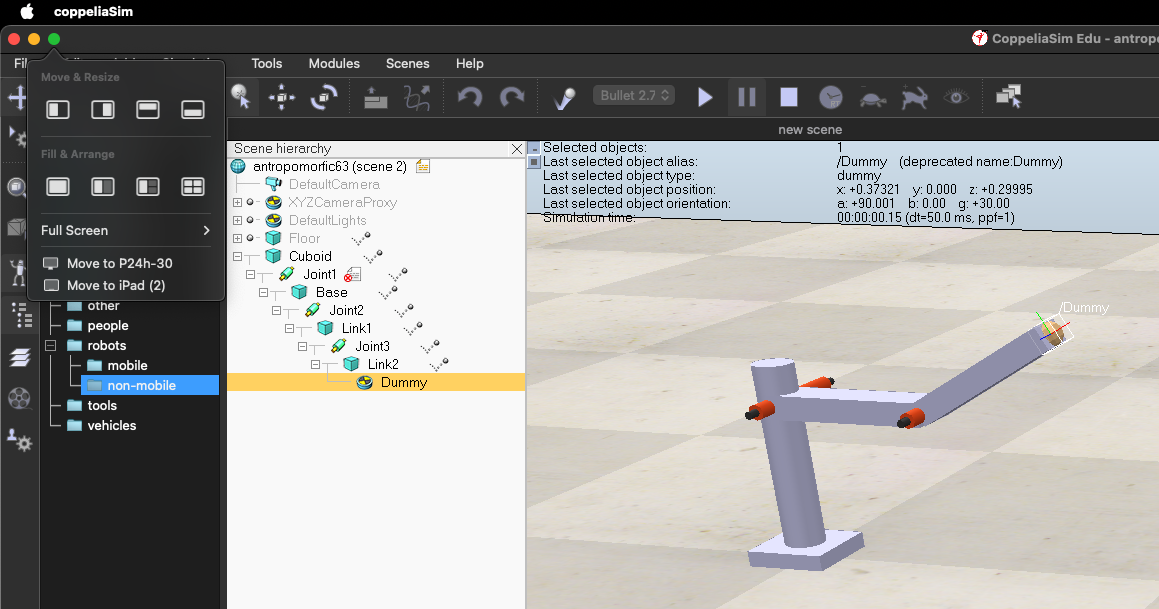

In [33]:
from IPython.display import Image, display

display(Image(filename='2017480-ex8-coppelia_check.png'))


### D) Draw the work areas at theta1 angles 0º, 90º, -60º

### EXAMPLE: REPRESENT AREAS BY LAYERS, LAYERS THAT WILL DEPEND ON THETA1=0

In [34]:

import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use
import plotly.graph_objs as go
from numpy import * 
from plotly.subplots import make_subplots

l1, l2, l3 = 0.2,0.2,0.2
theta2, theta3 = np.mgrid[-np.pi/2:np.pi/2:100j, -np.pi/2:np.pi/2:100j]
theta1=0

x = ((l2*cos(theta2)) + (l3*cos(theta2 + theta3)))*cos(theta1)
y = ((l2*cos(theta2)) + (l3*cos(theta2 + theta3)))*sin(theta1)
z = l1+l2*sin(theta2)+l3*sin(theta2 + theta3)

fig = make_subplots(rows=1, cols=1,
                    specs=[[{'is_3d': True}]],
                    subplot_titles=['WORK AREA'],
                    )

fig.add_trace(go.Surface(x=x, y=y, z=z, colorbar_x=-0.07))
fig.update_layout(title_text="ANTHROPOMORPHIC")
fig.show()

ModuleNotFoundError: No module named 'plotly'

## REPRESENT AREAS BY LAYERS, LAYERS THAT WILL DEPEND ON THETA1=-60º,0º,90º

In [ ]:
import numpy as np
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots

l1, l2, l3 = 0.2, 0.2, 0.2
theta2, theta3 = np.mgrid[-np.pi/2:np.pi/2:100j, -np.pi/2:np.pi/2:100j]
theta1_values = [0, 90, -60]

fig = make_subplots(rows=1, cols=1, specs=[[{'is_3d': True}]])

for theta1_deg in theta1_values:
    theta1 = np.deg2rad(theta1_deg)
    x = ((l2*np.cos(theta2)) + (l3*np.cos(theta2 + theta3)))*np.cos(theta1)
    y = ((l2*np.cos(theta2)) + (l3*np.cos(theta2 + theta3)))*np.sin(theta1)
    z = l1 + l2*np.sin(theta2) + l3*np.sin(theta2 + theta3)
    fig.add_trace(go.Surface(x=x, y=y, z=z, showscale=False, opacity=0.8))

fig.update_layout(
    title_text="Solution to Question D: Work Area for θ₁ = 0º, 90º, -60º",
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    ),
    width=500,
    height=500  # Try 900 or 1000 for a tall plot
)
fig.show()